In [1]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
from io import StringIO
# %load_ext autoreload
# %autoreload 2
# from pathlib import Path
# from IPython.display import display, HTML, Markdown
# import ipywidgets as widgets
# from ipywidgets.embed import embed_minimal_html, dependency_state
# import seaborn as sns
# import humanize
# import gettext
# from babel import Locale


In [2]:
# https://glav.su/forum/4/3858/6226354/#message6226354

s_title_1 = "Зависимость летальности от уровня вакцинации в процентах (44 государства Европы)."
s_title_2 = "Ситуация на период с 15 ноября по 21 ноября."

In [3]:
# Привитые полностью

source = StringIO("""10297081	Португалия	1	87,8	13262	66
366463	Исландия	2	81,6	982	0
47363419	Испания	3	80,3	24991	86
5840045	Дания	4	76,3	25730	44
59257566	Италия	5	72,8	60438	396
5379475	Норвегия	6	69,3	6546	44
4985674	Ирландия	7	75,7	28835	43
5529543	Финляндия	8	71,8	5094	1
17441500	Нидерланды	9	73,5	130813	207
64844037	Франция	10	69	112041	302
11544241	Бельгия	11	74,3	78980	206
67081000	Великобритания	12	67,6	278851	1038
34663	Сан-Марино	13	65,7	134	1
10353442	Швеция	14	68,8	6274	5
76860	Андорра	15	64	267	0
83155031	Германия	16	67,3	324244	470
2783483	Литва	17	65,5	12415	201
8916864	Австрия	18	64,3	93701	204
892005	Кипр	19	64,3	2373	1
9136000	Израиль	20	62	2677	8
1800000	Латвия	21	60,9	6853	237
38901	Лихтештейн	22	64,9	279	0
8636561	Швейцария	23	64,8	25832	40
10700556	Греция	24	62,7	46968	552
83614362	Турция	25	58,8	139261	1301
9750149	Венгрия	26	60,1	58704	913
1330068	Эстония	27	58,8	5009	60
10697858	Чехия	28	58,2	99425	529
2102419	Словения	29	54,8	23075	120
37899070	Польша	30	53,6	136325	1958
4047260	Хорватия	31	46,1	32218	404
6871547	Сербия	32	44,8	23426	393
5458827	Словакия	33	42,7	50040	343
1.46e+08	Россия	34	36,2	262337	8676
2829741	Албания	35	32,6	3510	46
9349645	Беларусь	36	25,7	12915	96
41418717	Украина	37	22,3	119459	4593
19257520	Грузия	38	24,6	28498	528
3496157	Босния и Герцеговина	39	22,1	4264	218
6934015	Болгария	40	24,5	17891	949
620739	Черногория	41	39,9	2818	46
19257520	Румыния	42	37,1	22791	2111
630419	Люксембург	43	65,4	1712	7
2597107	Молдавия	44	22,7	5271	365
""")

In [4]:
df = pd.read_csv(source, sep='\t', names=['population', 'country', 'n', 'vaccinated', 'cases', 'deaths'])

In [5]:
df.head()

,population,country,n,vaccinated,cases,deaths
0,10297081.0,Португалия,1,"87,8",13262,66
1,366463.0,Исландия,2,"81,6",982,0
2,47363419.0,Испания,3,"80,3",24991,86
3,5840045.0,Дания,4,"76,3",25730,44
4,59257566.0,Италия,5,"72,8",60438,396


In [6]:
df.dtypes

population    float64
country        object
n               int64
vaccinated     object
cases           int64
deaths          int64
dtype: object

In [7]:
def replace_point(v):
    v = v.replace(',', '.')
    return v

df.vaccinated = pd.to_numeric(df.vaccinated.apply(replace_point))

In [8]:
df = df.assign(cfr=df.deaths / df.cases)

In [9]:
df.head()

,population,country,n,vaccinated,cases,deaths,cfr
0,10297081.0,Португалия,1,87.8,13262,66,0.004977
1,366463.0,Исландия,2,81.6,982,0,0.000000
2,47363419.0,Испания,3,80.3,24991,86,0.003441
3,5840045.0,Дания,4,76.3,25730,44,0.001710
4,59257566.0,Италия,5,72.8,60438,396,0.006552


In [10]:
   
def anotate2(ax, xx, yy, labels, seed=10):
   
    rng = np.random.RandomState(seed)
    
    def get_random_an_xy():
        x = rng.choice([10, -10])
        y = rng.choice([10, -20])
        return x, y
    
    
    # https://stackoverflow.com/questions/5147112/how-to-put-individual-tags-for-a-matplotlib-scatter-plot
    for label, x, y in zip(labels, xx, yy):
        an_xy = get_random_an_xy()
        ax.annotate(
            label,
            xy=(x, y), xytext=an_xy,
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2),
            #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        )

In [11]:
def plot(logy=False, fn_save=None, seed=42):

    fig, ax = plt.subplots(figsize=(15, 12))

    xx = df.vaccinated
    if logy:
        yy = df.cfr + 0.0001
    else:
        yy = df.cfr * 100 + 0.01
        
    labels = df.country

    ax.scatter(xx, yy)

    anotate2(ax, xx, yy, labels, seed=seed)

    ax.set_title(s_title_1 + "\n" + s_title_2)

    ax.set_xlabel('Привитые полностью, %')
    
    if logy:
        ax.set_yscale('log')
        ax.set_ylabel('log(CFR + 0.001)')
    else:
        ax.set_ylabel('CFR, %')

    if fn_save != None:
        fig.savefig(fn_save)
            

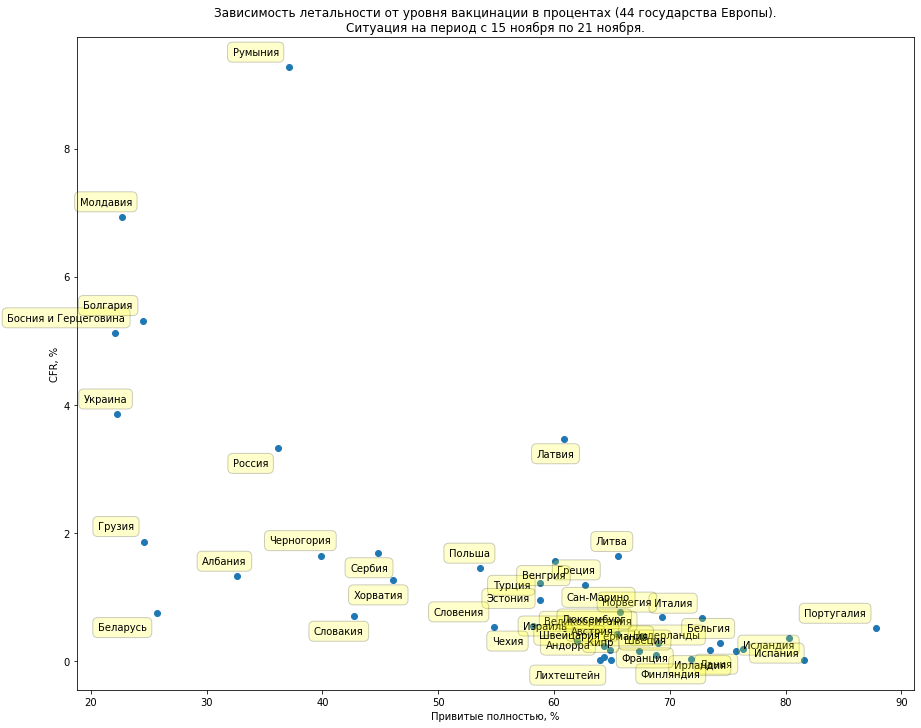

In [12]:
plot(seed=45, fn_save='cfr_by_vacc.png')

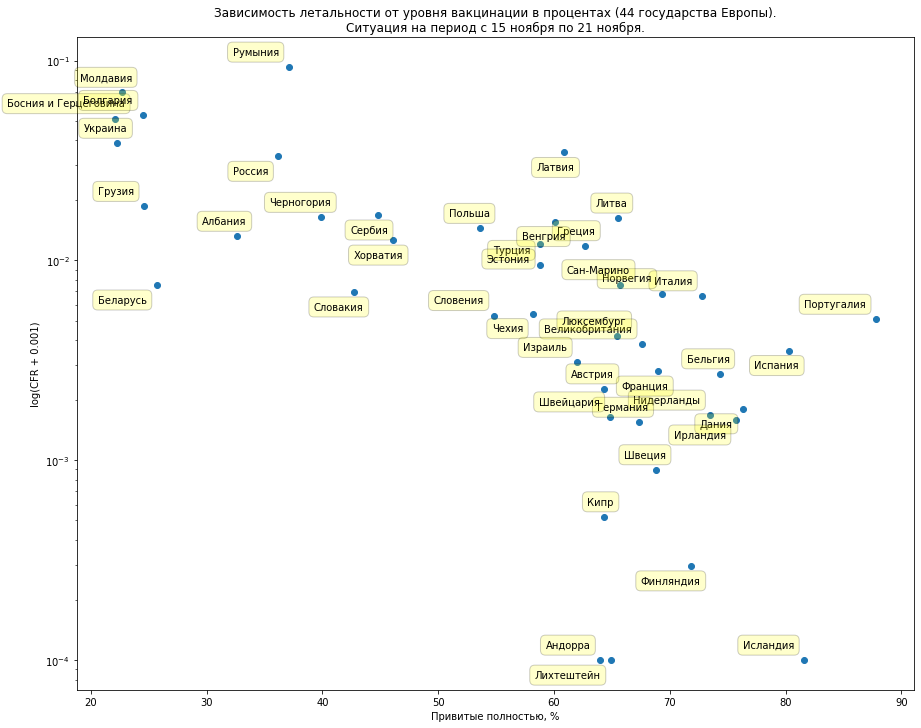

In [13]:
plot(True, seed=45, fn_save='cfr_by_vacc_log.png')